In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import numpy as np

In [6]:
df = pd.read_csv('scored_corpus_by_hand.csv')

In [7]:
df

,text,label,int-1,int-2,int-3,int-4,int-5,int-6,int-7,int-8,...,int-12,int-13,int-14,int-15,int-16,int-17,int-18,int-19,int-20,id
0,Hi!\nI've been meaning to write for ages and f...,B2,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
1,﻿It was not so much how hard people found the ...,B2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1
2,Keith recently came back from a trip to Chicag...,B2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,"The Griffith Observatory is a planetarium, and...",B2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
4,-LRB- The Hollywood Reporter -RRB- It's offici...,B2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1489,Light propagating in the vicinity of astrophys...,C2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1489
1490,Future of dentistry has become one of the most...,C2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1490
1491,﻿The forests – and suburbs – of Europe are ech...,C2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1491
1492,Hedge funds are turning bullish on oil once ag...,C2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1492


In [8]:
qid = 'int-1'
temp_df = df.sort_values(by=[qid], ascending=False)[0:100]
l = []
for index, row in temp_df.iterrows():
    l.append(row['id'])

In [9]:
temp_df

,text,label,int-1,int-2,int-3,int-4,int-5,int-6,int-7,int-8,...,int-12,int-13,int-14,int-15,int-16,int-17,int-18,int-19,int-20,id
498,Albert had been playing the guitar almost all ...,A2,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,498
920,Jacquelyn and her family were sleeping in thei...,B1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,920
404,One of the greatest moments in a young person'...,A2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,404
167,﻿The Duchess of Cambridge gave birth to a son ...,B2,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,167
201,"In the end, it was always Robin.\nThat was the...",B2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
965,Boston is the capital of Massachusetts. It is ...,B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,965
964,"In Los Angeles, places associated with death a...",B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,964
963,The Beatles are an English group of musicians ...,B1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,963
962,The original World Trade Center opened in New ...,B1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,962


In [230]:
i = l[100]
print(df.iloc[i,0])
# df.at[i, qid] = 1

IndexError: list index out of range

In [239]:
l = df.sort_values(by=[qid], ascending=False)[0:100]['int-1'].tolist()

Counter({5.0: 1, 4.0: 3, 3.0: 6, 2.0: 6, 1.0: 28, 0.0: 56})

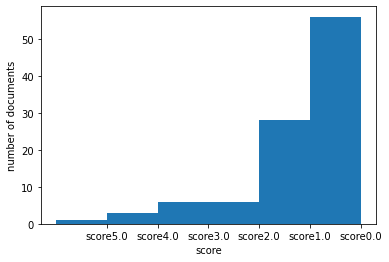

In [248]:
l_str = []
for e in l:
    string = 'score' + str(e)
    l_str.append(string)
labels, values = zip(*Counter(l_str).items())

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.xlabel('score')
plt.ylabel('number of documents')
plt.savefig('query1_distribution.jpg')

In [251]:
df.to_csv('scored_corpus_by_hand.csv', index=False)